In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
url = '/content/drive/MyDrive/Dataset DSML/CarPrice_Assignment.csv'
data = pd.read_csv(url)
# Display basic information about the dataset
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())
# Fill missing values in numeric columns with their median
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values in non-numeric columns with the mode
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("\nMissing values after handling:\n", data.isnull().sum())

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)


Missing values:
 car_ID             0
symboling          0
wheelbase          0
carlength          0
carwidth           0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 191, dtype: int64

Missing values after handling:
 car_ID             0
symboling          0
wheelbase          0
carlength          0
carwidth           0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 191, dtype: int64


<ipython-input-9-2ed376bb01f3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


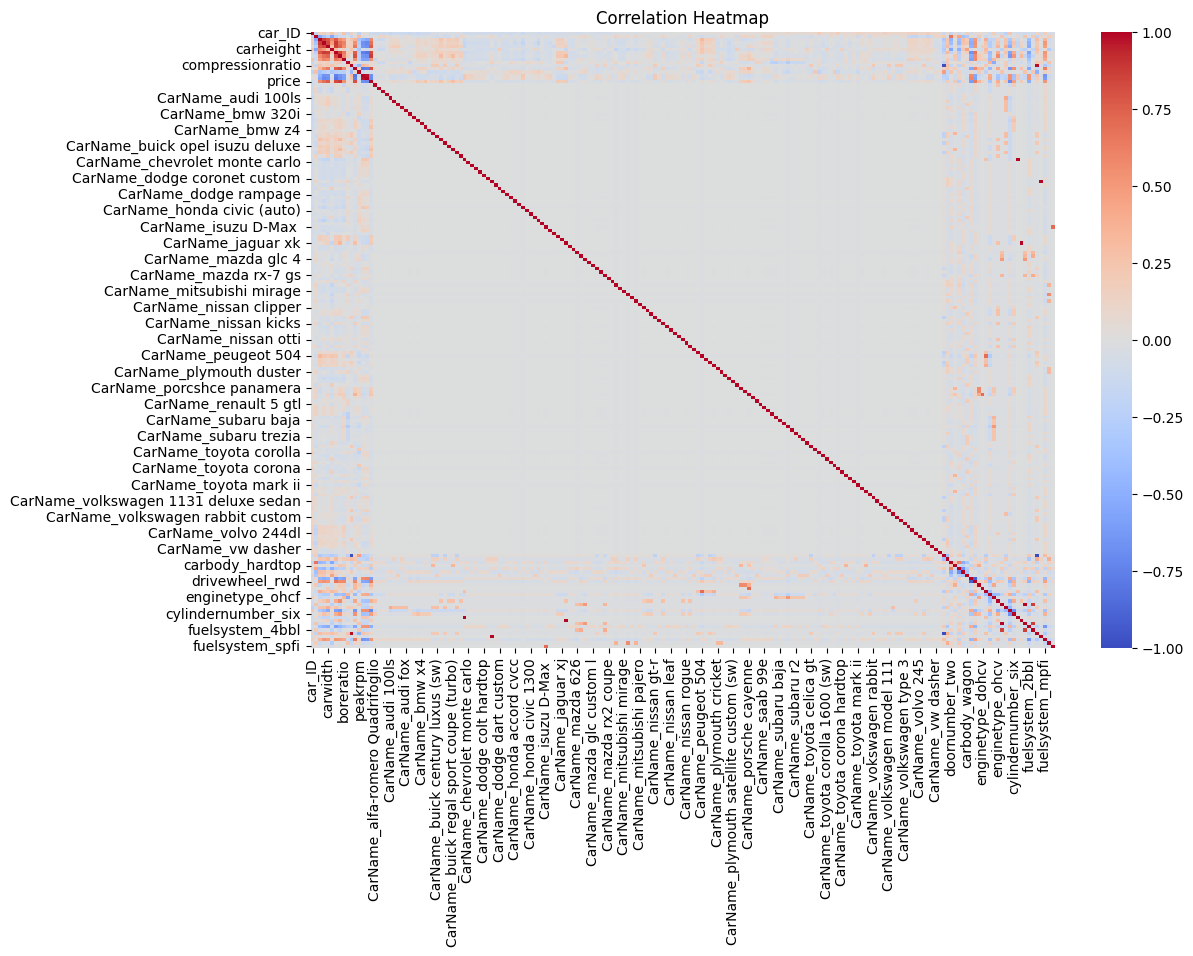

In [10]:
# Correlation heatmap to visualize relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [11]:

# Split the data into independent variables (X) and dependent variable (y)
X = data.drop("price", axis=1)  # Assuming 'price' is the target column
y = data["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate models
results = []

In [14]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    })

    # Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance:\n", results_df)



Model Performance:
                          Model  R-squared           MSE          MAE
0            Linear Regression  -1.239056  1.767601e+08  7280.667793
1      Decision Tree Regressor   0.866580  1.053268e+07  2098.308951
2      Random Forest Regressor   0.953732  3.652598e+06  1380.926171
3  Gradient Boosting Regressor   0.931561  5.402849e+06  1685.616428
4     Support Vector Regressor  -0.101989  8.699543e+07  5707.167500
5            Linear Regression  -1.239056  1.767601e+08  7280.667793
6      Decision Tree Regressor   0.866580  1.053268e+07  2098.308951
7      Random Forest Regressor   0.953732  3.652598e+06  1380.926171
8  Gradient Boosting Regressor   0.931561  5.402849e+06  1685.616428
9     Support Vector Regressor  -0.101989  8.699543e+07  5707.167500


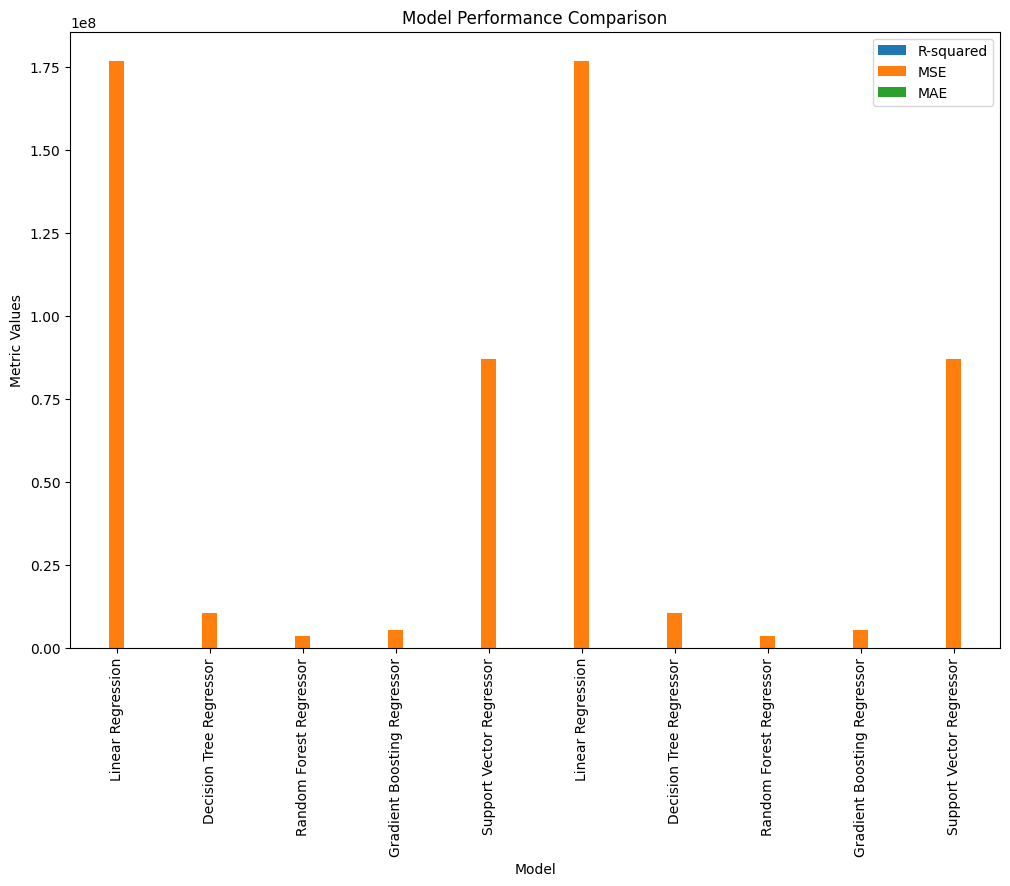

In [15]:

# Plot the performance
results_df.set_index("Model").plot(kind="bar", figsize=(12, 8))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Values")
plt.show()


In [16]:
# Identify the best model
best_model_name = results_df.loc[results_df["R-squared"].idxmax(), "Model"]
print(f"\nBest Performing Model: {best_model_name}")



Best Performing Model: Random Forest Regressor


In [17]:
# Feature importance analysis (only for tree-based models)
if best_model_name in ["Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"]:
    best_model = models[best_model_name]
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances = feature_importances.sort_values(ascending=False)
    print("\nFeature Importances:\n", feature_importances)



Feature Importances:
 enginesize                          0.549018
curbweight                          0.293698
highwaympg                          0.041858
horsepower                          0.028179
car_ID                              0.019694
                                      ...   
CarName_toyota corolla 1600 (sw)    0.000000
CarName_isuzu D-Max V-Cross         0.000000
CarName_vokswagen rabbit            0.000000
CarName_nissan nv200                0.000000
CarName_subaru baja                 0.000000
Length: 190, dtype: float64


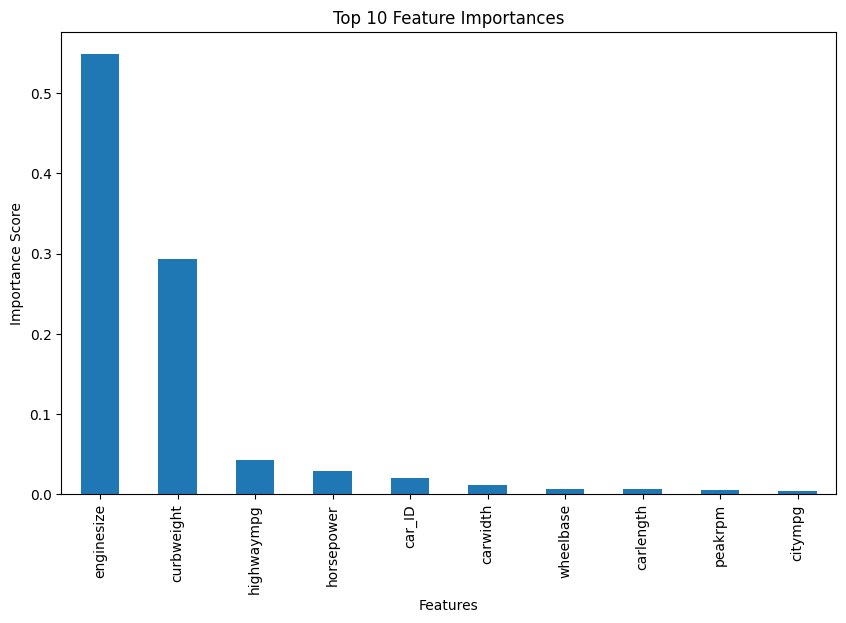

In [19]:
 # Plot feature importances
feature_importances.head(10).plot(kind="bar", figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [20]:
# Hyperparameter tuning (example for Random Forest Regressor)
if best_model_name == "Random Forest Regressor":
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("\nBest Hyperparameters for Random Forest Regressor:", best_params)


Best Hyperparameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [22]:
# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("\nTuned Model Performance:")
print(f"R-squared: {r2_tuned:.4f}, MSE: {mse_tuned:.4f}, MAE: {mae_tuned:.4f}")



Tuned Model Performance:
R-squared: 0.9425, MSE: 4536213.7564, MAE: 1483.3166
